In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import h5py
from tqdm import tqdm_notebook as tqdm
import random
from sklearn import preprocessing
from sklearn import *
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
df = pd.read_csv('/kaggle/input/textiledefectdetection/train32.csv')

In [ ]:
import h5py

In [ ]:
df.head()


,index,angle,indication_type,indication_value,split
0,48000,40,good,0,train
1,48001,60,good,0,train
2,48002,20,good,0,train
3,48003,40,good,0,train
4,48004,20,good,0,train


In [ ]:
df.shape

(48000, 5)

In [ ]:
df.info

<bound method DataFrame.info of        index  angle indication_type  indication_value  split
0      48000     40            good                 0  train
1      48001     60            good                 0  train
2      48002     20            good                 0  train
3      48003     40            good                 0  train
4      48004     20            good                 0  train
...      ...    ...             ...               ...    ...
47995  95995     20          thread                 4  train
47996  95996    100          thread                 4  train
47997  95997    120          thread                 4  train
47998  95998    120          thread                 4  train
47999  95999     20          thread                 4  train

[48000 rows x 5 columns]>

In [ ]:
df.isnull().sum()

index               0
angle               0
indication_type     0
indication_value    0
split               0
dtype: int64

In [ ]:
print(df.describe())


              index         angle  indication_value
count  48000.000000  48000.000000      48000.000000
mean   71999.500000     70.117917          2.500000
std    13856.550797     45.875883          1.707843
min    48000.000000      0.000000          0.000000
25%    59999.750000     20.000000          1.000000
50%    71999.500000     80.000000          2.500000
75%    83999.250000    120.000000          4.000000
max    95999.000000    140.000000          5.000000


In [ ]:
f = h5py.File('/kaggle/input/textiledefectdetection/matchingtDATASET_train_32.h5', 'r')

In [ ]:
f.keys()

<KeysViewHDF5 ['color', 'cut', 'good', 'hole', 'metal_contamination', 'thread']>

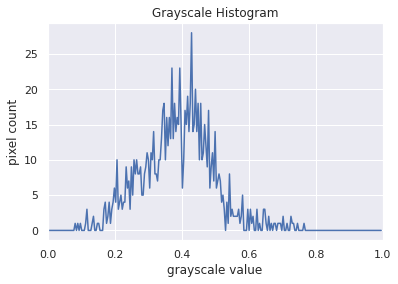

In [ ]:
data=f['hole']['angle0']
histogram, bin_edges = np.histogram(data[0][0], bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])

plt.plot(bin_edges[0:-1], histogram)

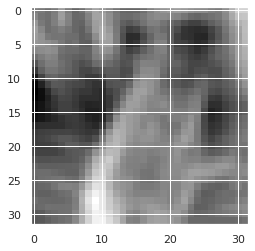

In [ ]:
data=f['hole']['angle0']
plt.imshow(data[0][0],cmap='gray')
f.close()

In [ ]:
def getData(path):
    data=[]
    f=h5py.File(path, 'r')
    for label in tqdm(f.keys()):
        for angleKey in f[label].keys():
            for arr in f[label][angleKey]:
                data.append([arr[0],angleKey,label])
    f.close()
    return (data)
train_data=getData('/kaggle/input/textiledefectdetection/matchingtDATASET_train_32.h5')
test_data=getData('/kaggle/input/textiledefectdetection/matchingtDATASET_test_32.h5')

100%|██████████| 6/6 [00:01<00:00,  3.22it/s]


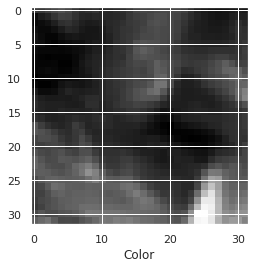

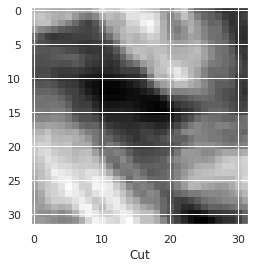

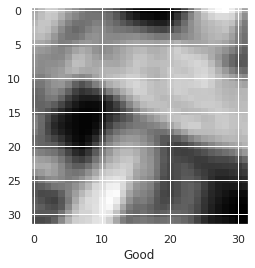

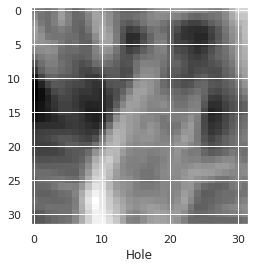

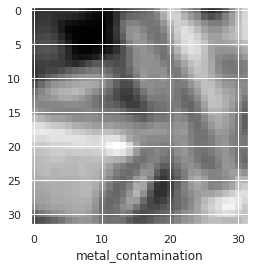

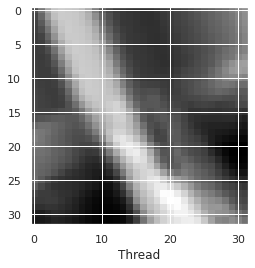

In [ ]:
c=0
d=0
e=0
f=0
g=0
h=0
for i in train_data:
    image=i[0]
    angle=i[1]
    label=i[2]
    if label=='color':
        if c==0:
            plt.imshow(i[0],cmap='gray')
            plt.xlabel("Color")
            plt.show()
            c=1
    elif label=='cut':
        if d==0:
            plt.imshow(i[0],cmap='gray')
            plt.xlabel("Cut")
            plt.show()
            d=1
    elif label=='metal_contamination':
        if e==0:
            plt.imshow(i[0],cmap='gray')
            plt.xlabel("metal_contamination")
            plt.show()
            e=1
    elif label=='good':
        if f==0:
            plt.imshow(i[0],cmap='gray')
            plt.xlabel("Good")
            plt.show()
            f=1
    elif label=='hole':
        if g==0:
            plt.imshow(i[0],cmap='gray')
            plt.xlabel("Hole")
            plt.show()
            g=1
    elif label=='thread':
        if h==0:
            plt.imshow(i[0],cmap='gray')
            plt.xlabel("Thread")
            plt.show()
            h=1
    if c==1 and d==1 and e==1 and f==1 and g==1 and h==1:
        break


In [ ]:
z=[]
for i in tqdm(train_data):
    image=i[0]
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
    z.append(histogram)
x_train_hist=z
print(z[0:1])

100%|██████████| 72000/72000 [00:09<00:00, 7958.15it/s]

[array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,
        9, 13, 20, 11, 10, 11, 11,  9, 12, 16, 15, 18, 33, 35, 35, 40, 33,
       30, 34, 28, 26, 35, 26, 24, 18, 25, 17, 19, 17, 21, 21, 25, 17, 24,
       18, 10, 15, 22,  9, 12, 15, 19, 13, 18, 11, 11, 11,  9, 11,  8,  4,
        7,  6,  4,  3,  4,  2,  3,  2,  1,  1,  0,  1,  1,  4,  1,  0,  1,
        3,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  3,  0,  1,  0,  0,  2,  1,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  

In [ ]:
z=[]
for i in tqdm(test_data):
    image=i[0]
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
    z.append(histogram)
x_test_hist=z
print(z[0:1])

100%|██████████| 36000/36000 [00:04<00:00, 8027.47it/s]

[array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3,
       16, 14,  9, 12, 10,  5,  5,  4,  9,  4,  9, 12, 12, 13, 20, 22, 36,
       41, 42, 26, 31, 24, 23, 31, 14, 22, 23, 25, 21, 17, 12, 25, 20, 21,
       16, 16, 18, 14, 15, 30, 15, 21, 11, 20, 18, 16, 13, 10,  8,  9,  6,
       12,  5,  6,  8,  4, 13,  9,  5,  7,  6,  6,  3,  2,  2,  4,  3,  2,
        2,  0,  1,  2,  3,  2,  3,  1,  0,  1,  0,  1,  2,  1,  5,  0,  0,
        0,  1,  0,  2,  1,  1,  0,  0,  0,  0,  1,  1,  2,  0,  0,  1,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  

In [ ]:
LE=preprocessing.LabelEncoder()
def splitData(data):
    random.shuffle(data)
    X=[]
    angleArr=[]
    y=[]
    for i in tqdm(data):
        image=i[0]
        angle=i[1]
        label=i[2]
        X.append(image.flatten())
        angleArr.append(angle)
        y.append(label)
    z=LE.fit(y)
    #print(list(LE.classes_))
    a=z.transform(y)
    return(X,a,angleArr,y)
X_train,y_train,angles_train,y=splitData(train_data)
X_test,y_test,angles_test,y2=splitData(test_data)

print("Color Values in Train")
print(y.count('color'))
print("Cut Values in Train")
print(y.count('cut'))
print("Hole Values in Train")
print(y.count('hole'))
print("Good Values in Train")
print(y.count('good'))
print("Thread Values in Train")
print(y.count('thread'))
print("Metal_contamination Values in Train")
print(y.count('metal_contamination'))

100%|██████████| 36000/36000 [00:00<00:00, 143406.99it/s]


Color Values in Train
12000
Cut Values in Train
12000
Hole Values in Train
12000
Good Values in Train
12000
Thread Values in Train
12000
Metal_contamination Values in Train
12000


In [ ]:
X_train =  X_train[:1000]
y_train = y_train[:1000]

X_test = X_test[:1000]
y_test = y_test[:1000]

x_train_hist = x_train_hist[:1000]
x_test_hist = x_test_hist[:1000]

In [ ]:
reg_rf_hist = tree.DecisionTreeClassifier()
reg_rf_hist.fit(x_train_hist,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = reg_rf.predict(X_test)
print(y_predict[0:10])


[3 1 0 1 3 4 5 2 1 1]


In [ ]:
y_predict_hist = reg_rf_hist.predict(x_test_hist)

Accuracy is 28.000000000000004


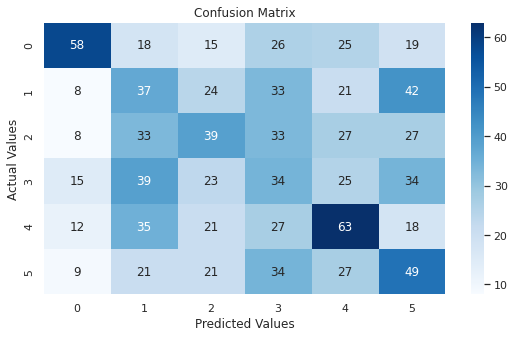

In [ ]:
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_predict)*100))

Accuracy is 16.2


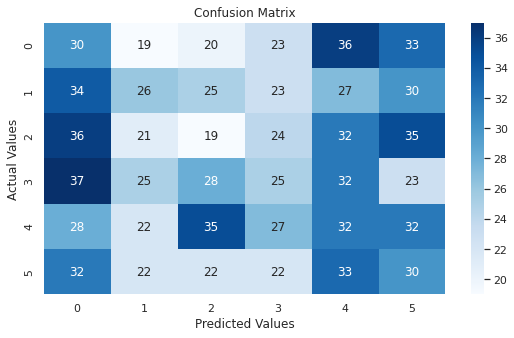

In [ ]:
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,y_predict_hist)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_predict_hist)*100))

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,y_predict))
print('MSE',metrics.mean_squared_error(y_test,y_predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("\n")
print('MAE_h',metrics.mean_absolute_error(y_test,y_predict_hist))
print('MSE_h',metrics.mean_squared_error(y_test,y_predict_hist))
print('RMSE_h',np.sqrt(metrics.mean_squared_error(y_test,y_predict_hist)))

MAE 1.633
MSE 4.685
RMSE 2.164486082191336


MAE_h 1.994
MSE_h 6.114
RMSE_h 2.472650399874596


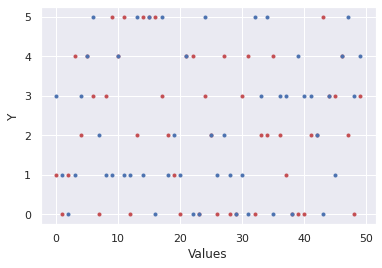

In [ ]:
plt.plot(y_test[:50],"r.",y_predict[:50],"b.")
plt.xlabel("Values")
plt.ylabel("Y")
plt.show()

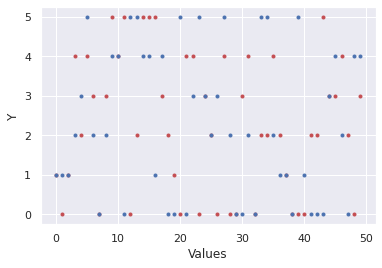

In [ ]:
plt.plot(y_test[:50],"r.",y_predict_hist[:50],"b.")
plt.xlabel("Values")
plt.ylabel("Y")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model = RandomForestClassifier()
model_hist = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model_hist.fit(x_train_hist,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred[0:10])

[2 0 0 4 2 4 5 3 1 1]


In [ ]:
y_pred_hist = model_hist.predict(x_test_hist)

Accuracy is 37.5


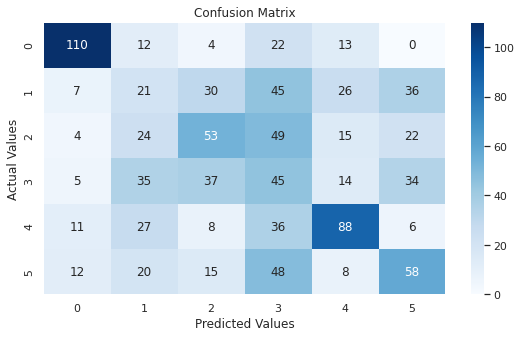

In [ ]:
from sklearn.metrics import accuracy_score
cm2=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix")
sns.heatmap(cm2, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)*100))

Accuracy is 16.8


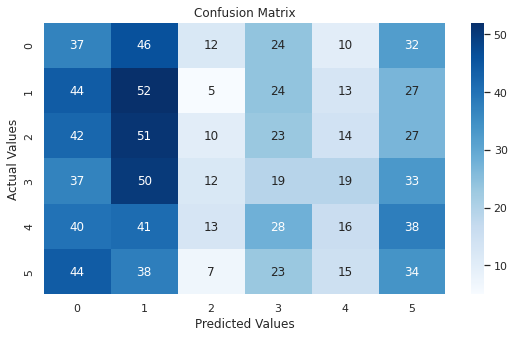

In [ ]:
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,y_pred_hist)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_pred_hist)*100))

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("\n")
print('MAE_h',metrics.mean_absolute_error(y_test,y_pred_hist))
print('MSE_h',metrics.mean_squared_error(y_test,y_pred_hist))
print('RMSE_h',np.sqrt(metrics.mean_squared_error(y_test,y_pred_hist)))

MAE 1.34
MSE 3.628
RMSE 1.9047309521294602


MAE_h 1.99
MSE_h 6.206
RMSE_h 2.4911844572411734


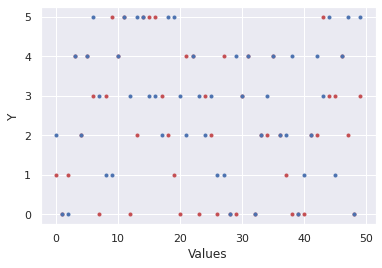

In [ ]:
plt.plot(y_test[:50],"r.",y_pred[:50],"b.")
plt.xlabel("Values")
plt.ylabel("Y")
plt.show()

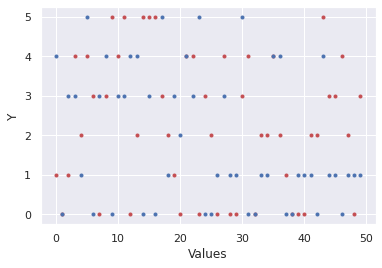

In [ ]:
plt.plot(y_test[:50],"r.",y_pred_hist[:50],"b.")
plt.xlabel("Values")
plt.ylabel("Y")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf_hist = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train,y_train)
knn_clf_hist.fit(x_train_hist,y_train)
knn_predictions = knn_clf.predict(X_test)
knn_predictions_hist = knn_clf_hist.predict(x_test_hist)
print('Accuracy of the knn algorithm is : {}'.format(accuracy_score(y_test,knn_predictions)))
print('Accuracy of the knn algorithm hist is : {}'.format(accuracy_score(y_test,knn_predictions_hist)))

Accuracy of the knn algorithm is : 0.354
Accuracy of the knn algorithm hist is : 0.161


Accuracy is 35.4


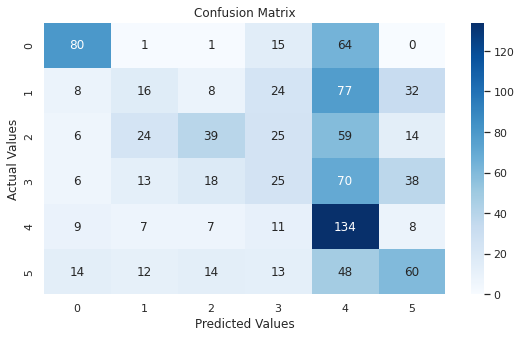

In [ ]:
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,knn_predictions)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, knn_predictions)*100))

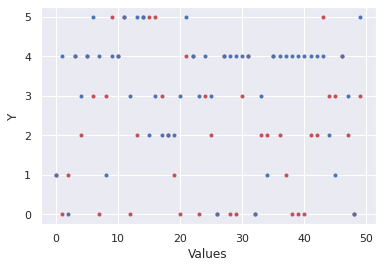

In [ ]:
plt.plot(y_test[:50],"r.",knn_predictions[:50],"b.")
plt.xlabel("Values")
plt.ylabel("Y")
plt.show()

Accuracy is 16.1


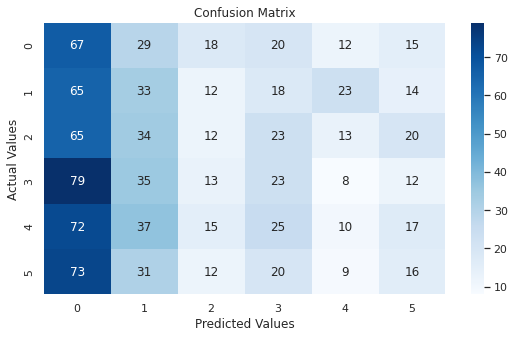

In [ ]:
cm=confusion_matrix(y_test,knn_predictions_hist)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, knn_predictions_hist)*100))

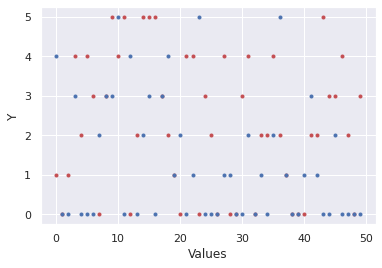

In [ ]:
plt.plot(y_test[:50],"r.",knn_predictions_hist[:50],"b.")
plt.xlabel("Values")
plt.ylabel("Y")
plt.show()

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,knn_predictions))
print('MSE',metrics.mean_squared_error(y_test,knn_predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,knn_predictions)))
print("\n")
print('MAE_h',metrics.mean_absolute_error(y_test,knn_predictions_hist))
print('MSE_h',metrics.mean_squared_error(y_test,knn_predictions_hist))
print('RMSE_h',np.sqrt(metrics.mean_squared_error(y_test,knn_predictions_hist)))

MAE 1.48
MSE 4.284
RMSE 2.0697825972792407


MAE_h 2.156
MSE_h 7.002
RMSE_h 2.6461292485439936


Gray-Level Co-Occurrence Matrix